# Infraestrutura

**1. Você está rodando em Python 3.9+**

In [1]:
!python --version

Python 3.11.9


**2. Você está usando um ambiente virtual: Virtualenv ou Anaconda**

Resposta: foi criado ambiente virtual usando Venv. O código abaixo mostra que o ambiente foi criado e o diretório dele:

In [2]:
import sys
import os

def get_venv_info():
    # Verificar se está sendo acessado o ambiente virtual
    in_venv = (
        hasattr(sys, 'real_prefix') or
        (hasattr(sys, 'base_prefix') and sys.base_prefix != sys.prefix)
    )

    # Verificar se o gerador de ambiente virtual é o Venv
    venv_marker = os.path.isfile(os.path.join(sys.prefix, 'pyvenv.cfg'))

    if in_venv and venv_marker:
        return {
            "is_venv": True,
            "venv_path": sys.prefix
        }
    else:
        return {
            "is_venv": False,
            "venv_path": None
        }

info = get_venv_info()
print("Is venv:", info["is_venv"])
print("Venv path:", info["venv_path"])

Is venv: True
Venv path: c:\Users\Kleber\Documents\curso_intel_artificial\validacao_clusterizacao\pd_validacao_clusterizacao_virtual


**3. Todas as bibliotecas usadas nesse exercícios estão instaladas em um ambiente virtual específico**

Resposta: o código abaixo mostra os pacotes que estão instalado no ambiente virtual.

In [3]:
import sys
import subprocess
print("Ambiente virtual: " + sys.prefix)
result = subprocess.run(['pip', 'list'], capture_output=True, text=True)
output = result.stdout
packages = [
    line.split()
    for line in output.strip().split('\n')[2:] 
]
print("Lista de bibliotecas instaladas no ambiente virtual:")
for name, version in packages:
    print(f"{name} → {version}")
print("Quantidade de bibliotecas instaladas no ambiente virtual: " + 
      str(len(packages)))

Ambiente virtual: c:\Users\Kleber\Documents\curso_intel_artificial\validacao_clusterizacao\pd_validacao_clusterizacao_virtual
Lista de bibliotecas instaladas no ambiente virtual:
anyio → 4.11.0
argon2-cffi → 25.1.0
argon2-cffi-bindings → 25.1.0
arrow → 1.4.0
asttokens → 3.0.1
async-lru → 2.0.5
attrs → 25.4.0
babel → 2.17.0
beautifulsoup4 → 4.14.2
bleach → 6.3.0
certifi → 2025.11.12
cffi → 2.0.0
charset-normalizer → 3.4.4
colorama → 0.4.6
comm → 0.2.3
contourpy → 1.3.3
cycler → 0.12.1
debugpy → 1.8.17
decorator → 5.2.1
defusedxml → 0.7.1
executing → 2.2.1
fastjsonschema → 2.21.2
fonttools → 4.60.1
fqdn → 1.5.1
h11 → 0.16.0
httpcore → 1.0.9
httpx → 0.28.1
idna → 3.11
ipykernel → 7.1.0
ipython → 9.7.0
ipython_pygments_lexers → 1.1.1
ipywidgets → 8.1.8
isoduration → 20.11.0
jedi → 0.19.2
Jinja2 → 3.1.6
joblib → 1.5.2
json5 → 0.12.1
jsonpointer → 3.0.0
jsonschema → 4.25.1
jsonschema-specifications → 2025.9.1
jupyter → 1.1.1
jupyter_client → 8.6.3
jupyter-console → 6.6.3
jupyter_core → 5.9.1

**4. Gere um arquivo de requerimentos (requirements.txt) com os pacotes necessários. É necessário se certificar que a versão do pacote está disponibilizada.**

Resposta:

In [4]:
!pip freeze > requirements.txt

**5. Tire um printscreen do ambiente que será usado rodando em sua máquina.**

![](ambiente_virtual.png)

**6. Disponibilize os códigos gerados, assim como os artefatos acessórios (requirements.txt) e instruções em um repositório GIT público. (se isso não for feito, o diretório com esses arquivos deverá ser enviado compactado no moodle).**

Resposta: https://github.com/kleberga/pd_validacao_clusterizacao

# Escolha de base de dados

**1. Escolha uma base de dados para realizar o trabalho. Essa base será usada em um problema de clusterização.**

Resposta: a base de dados escolhida foi a base de dados sócio-econômicos e de saúde que determinam o índice de desenvolvimento dos países. A base está disponível no Kaggle por meio da seguinte URL: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data

**2. Escreva a justificativa para a escolha de dados, dando sua motivação e objetivos.**


Resposta: a base escolhida foi utilizada no PD da disciplina "Algoritmos de Inteligência Artificial para clusterização [25E4_2]". Agora, há a possibilidade de ser aplicar novos conhecimentos na clusterização destes dados, como a escolha ótima de clusters e medidas de validação, gerando melhores modelos e aprimorando o trabalho realizado na disciplina anterior.

**3. Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?**

In [5]:
# Importação das bibliotecas
import kagglehub
import pandas as pd

# Baixar o arquivo
path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")

# carregar o arquivo
paises = pd.read_csv(path + "/Country-data.csv")

# verificar se há valores faltando
print(paises.isnull().any())

# verificar o formato das variáveis
print(paises.info())

paises.head()

country       False
child_mort    False
exports       False
health        False
imports       False
income        False
inflation     False
life_expec    False
total_fer     False
gdpp          False
dtype: bool
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
None


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


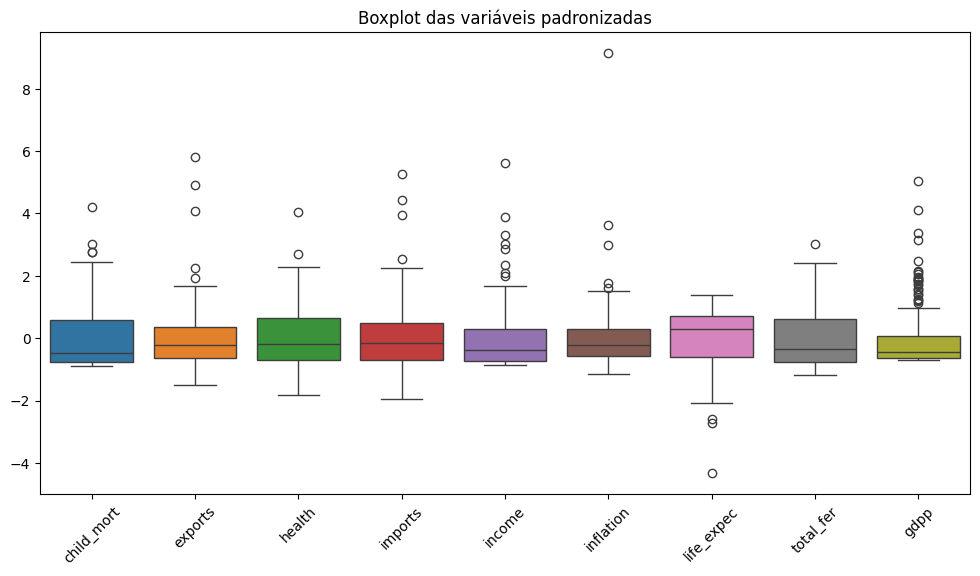

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Remover a coluna 'country' para focar nas variáveis numéricas
paises_numeric = paises.drop(columns=['country'])

# Padronizar os dados
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(paises_numeric), 
                         columns=paises_numeric.columns)

# Plotar boxplot com dados padronizados
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_scaled)
plt.xticks(rotation=45)
plt.title('Boxplot das variáveis padronizadas')
plt.show()

In [7]:
# método do Intervalo Interquartil (IQR) para detecção de outliers
outliers = pd.DataFrame()

for column in paises_numeric.columns:
    Q1 = paises_numeric[column].quantile(0.25)
    Q3 = paises_numeric[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificar outliers
    outlier_mask = (paises_numeric[column] < lower_bound) | (paises_numeric[column] > upper_bound)
    outliers[column] = outlier_mask

# Mostrar quantos outliers existem por variável
print(outliers.sum())

child_mort     4
exports        5
health         2
imports        4
income         8
inflation      5
life_expec     3
total_fer      1
gdpp          25
dtype: int64


In [8]:
# mostrar os outliers, a fim de verificar se não são algum erro de digitação
outliers_por_coluna = {}

for column in paises_numeric.columns:
    Q1 = paises_numeric[column].quantile(0.25)
    Q3 = paises_numeric[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificar os outliers
    outlier_mask = (paises_numeric[column] < lower_bound) | (paises_numeric[column] > upper_bound)

    # Criar um DataFrame com país e valor do outlier
    outliers_df = paises.loc[outlier_mask, ["country", column]]
    outliers_por_coluna[column] = outliers_df

# Exibir os outliers por variável
for column, df in outliers_por_coluna.items():
    print(f"\nOutliers em '{column}':")
    print(df)


Outliers em 'child_mort':
                      country  child_mort
31   Central African Republic       149.0
32                       Chad       150.0
66                      Haiti       208.0
132              Sierra Leone       160.0

Outliers em 'exports':
        country  exports
73      Ireland    103.0
91   Luxembourg    175.0
98        Malta    153.0
131  Seychelles     93.8
133   Singapore    200.0

Outliers em 'health':
                   country  health
101  Micronesia, Fed. Sts.    14.2
159          United States    17.9

Outliers em 'imports':
        country  imports
91   Luxembourg    142.0
98        Malta    154.0
131  Seychelles    108.0
133   Singapore    174.0

Outliers em 'income':
                  country  income
23                 Brunei   80600
82                 Kuwait   75200
91             Luxembourg   91700
114                Norway   62300
123                 Qatar  125000
133             Singapore   72100
145           Switzerland   55500
157  United Arab 

Resposta: por meio dos resultados mostrados anteriormente, foi identificado:
1. as variáveis estão em escalas diferentes;
2. não há valores faltantes (*missings*);
3. com exceção do nome do país, as demais variáveis estão no formato numérico, o que é necessário para a clusterização; e
4. todas as variáveis possuem *outliers*. Contudo, foi identificado que os *outliers* não aparentam ser erros de digitação, mas características dos países, que naturalmente são discrepantes entre si.

Antes da etapa de clusterização, é necessário:
1. verificar se há valores faltando (*missings*). Se houver, deve ser adotado algum procedimento para removê-los, como excluir a instância com o valor faltando ou preenchê-lo com a média das demais instâncias, por exemplo;
2. verificar se há *outliers*. Se houver, verificar se o mesmo deve ser tratado, como substituí-lo pela média ou excluí-lo, por exemplo. Também pode ser decidido manter os *outliers* sem alteração; 
3. verificar se as variáveis que serão utilizadas na clusterização estão no formato numérico. Se não estiverem, é necessário transformá-las; e
4. colocar todas as variáveis na mesma escala, caso não estejam.

**4. Realize o pré-processamento adequado dos dados. Descreva os passos necessários.**

Resposta: conforme o código abaixo, o pré-processamento consiste em:

1. escalonar os dados; e
2. transformá-los de novo em DataFrame.

In [9]:
from sklearn.preprocessing import StandardScaler

# Escalonar os dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(paises_numeric)

# Converter de volta para DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=paises_numeric.columns)

# Visualizar os dados escalados
print(df_scaled.head())

   child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274    0.670423   
3    2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   -1.179234   
4   -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749    0.704258   

   total_fer      gdpp  
0   1.902882 -0.679180  
1  -0.859973 -0.485623  
2  -0.038404 -0.465376  
3   2.128151 -0.516268  
4  -0.541946 -0.041817  


# Clusterização

**1. Realizar o agrupamento dos dados, escolhendo o número ótimo de clusters. Para tal, use o índice de silhueta e as técnicas:**
1. **K-Médias**
2. **DBScan**

Resposta: o código abaixo busca identificar o número ótimo de clusters com o índice de silhueta para o algoritmo K-Médias.

In [78]:
# carregar as bibliotecas
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# valor de inicio da range de min_samples
valor_inicio = 2

# valor final da range de min_samples
valor_final = 11

# range de busca
range_busca = range(valor_inicio, valor_final)

# criar uma lista com os resultados do K-Médias para diferentes valores de K
clusters_list = [
    KMeans(n_clusters=k, random_state=42).fit(df_scaled) for k in range_busca
]

# calcular o índice de silhueta para os resultados gerados do K-Médias
silhouette_list_kmeans = [
    silhouette_score(df_scaled, cluster_model.labels_) for cluster_model in clusters_list
]

# filtrar o maior valor
maior_valor_kmedias = {"n_cluters": '', 'score': -1}
for indice, valor in enumerate(silhouette_list_kmeans):
    if valor > maior_valor_kmedias['score']:
        maior_valor_kmedias['score'] = valor
        maior_valor_kmedias['n_cluters'] = indice+valor_inicio

# número ótimo de clusters e maior índice de silhueta
print(maior_valor_kmedias)

# calcular a clusterização pelo K-Médias com o número ótimo de clusters
valor_otimo_kmedias = KMeans(n_clusters=maior_valor_kmedias['n_cluters'], random_state=42).fit(df_scaled)

{'n_cluters': 5, 'score': 0.30088229124112015}


Continuação da resposta: o código abaixo busca identificar os valores ótimos de min_samples e eps para o DBScan. 

In [ ]:
import numpy as np

# gerar o vetor de eps para busca em grid
eps_valores = np.linspace(0.05, 5.0, 100)

# gerar o vetor de min_samples para busca em grid
min_samples_valores = range(2, (int(np.log(df_scaled.shape[0])) + 1), 1)

# criar uma lista vazia
parametros = []

# preencher a lista com um dicionário de eps e min_samples
for eps in eps_valores:
  for min_samples in min_samples_valores:
    parametros.append({
        'eps': eps,
        'min_samples': min_samples
    })

In [64]:
# importar a biblioteca
from sklearn.cluster import DBSCAN

# criar uma lista vazia
silhouette_list_dbscan = []

# aplicar o DBScan para cada eps e min_sample
for param in parametros:

  eps = param['eps']
  min_samples = param['min_samples']

  dbscan_model = DBSCAN(eps=eps, min_samples=min_samples).fit(df_scaled)
  labels = dbscan_model.labels_

  dbscan_model.leaf_size

  if len(set(labels)) > 1:
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    score = silhouette_score(df_scaled, labels)
    silhouette_list_dbscan.append({'eps': eps, 'min_samples': min_samples, 'score': score, 'n_clusters': n_clusters})

In [66]:
# mostrar as 10 combinações com maiores valores de índice de silhueta
melhores = sorted(silhouette_list_dbscan, key=lambda x: x['score'], reverse=True)[:10]
for m in melhores:
    print(m)

{'eps': np.float64(4.05), 'min_samples': 2, 'score': 0.6303375987432929, 'n_clusters': 1}
{'eps': np.float64(4.05), 'min_samples': 3, 'score': 0.6303375987432929, 'n_clusters': 1}
{'eps': np.float64(4.1), 'min_samples': 2, 'score': 0.6303375987432929, 'n_clusters': 1}
{'eps': np.float64(4.1), 'min_samples': 3, 'score': 0.6303375987432929, 'n_clusters': 1}
{'eps': np.float64(4.15), 'min_samples': 2, 'score': 0.6303375987432929, 'n_clusters': 1}
{'eps': np.float64(4.15), 'min_samples': 3, 'score': 0.6303375987432929, 'n_clusters': 1}
{'eps': np.float64(4.2), 'min_samples': 2, 'score': 0.6303375987432929, 'n_clusters': 1}
{'eps': np.float64(4.2), 'min_samples': 3, 'score': 0.6303375987432929, 'n_clusters': 1}
{'eps': np.float64(4.25), 'min_samples': 2, 'score': 0.6303375987432929, 'n_clusters': 1}
{'eps': np.float64(4.25), 'min_samples': 3, 'score': 0.6303375987432929, 'n_clusters': 1}


In [67]:
# gerar a clusterização com a melhor combinação de eps e min_samples
dbscan_model = DBSCAN(eps=melhores[0]['eps'], min_samples=melhores[0]['min_samples']).fit(df_scaled)
labels = dbscan_model.labels_

# calcular o indice de silhueta do modelo
sil = silhouette_score(df_scaled, labels)
print(f'Índice de Silhueta Score: {sil:.3f}')

# calcular a quantidade de clusters e de ruídos gerados
labels = dbscan_model.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Número de clusters:", n_clusters)
print("Número de pontos de ruído:", n_noise)

Índice de Silhueta Score: 0.630
Número de clusters: 1
Número de pontos de ruído: 1


**2. Com os resultados em mão, descreva o processo de mensuração do índice de silhueta. Mostre o gráfico e justifique o número de clusters escolhidos.**

Resposta: os códigos abaixo geram o gráfico do Índice de Silhueta para a escolha da quantidade ótima de clusters usando o K-Médias.

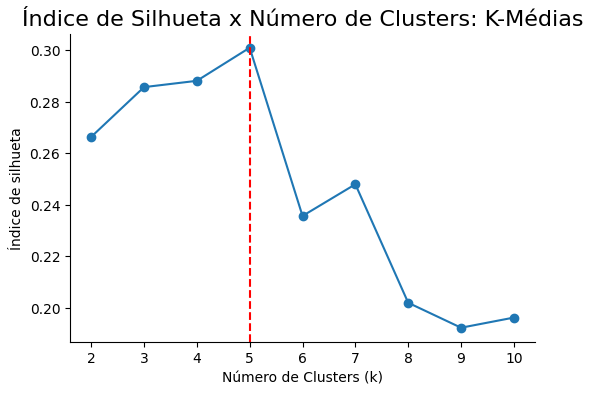

In [49]:
# gerar o gráfico do índice de silhueta do K-Médias
f, ax = plt.subplots(figsize=(6, 4))

ax.plot(range_busca, silhouette_list_kmeans, marker='o')

ax.set_xlabel('Número de Clusters (k)')
ax.set_ylabel('Índice de silhueta')
ax.set_title('Índice de Silhueta x Número de Clusters: K-Médias', fontsize=16)
ax.axvline(x=5, color='red', linestyle='--')

sns.despine()
plt.show()

Continuação da resposta: os códigos abaixo geram o gráfico do Índice de Silhueta para a escolha dos valores ótimos de 'eps' e 'min_samples' para o DBScan.

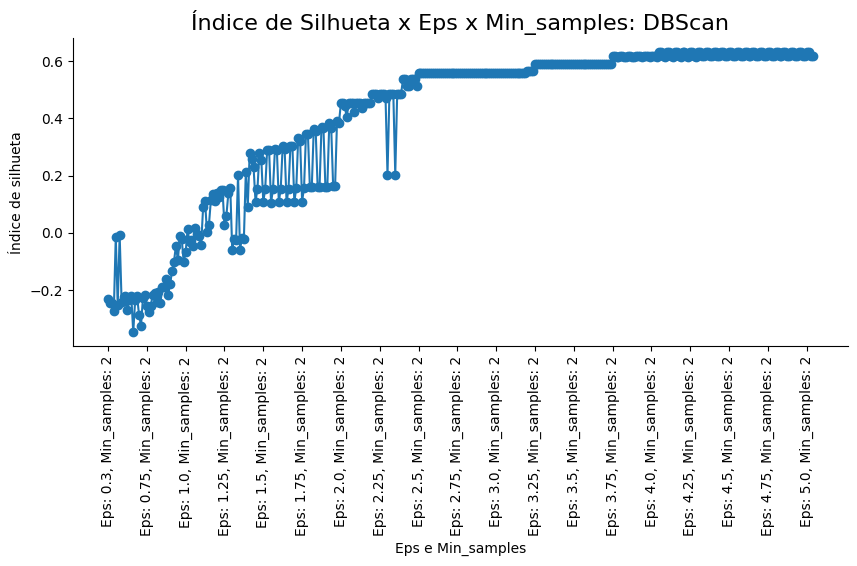

In [68]:
# filtrar apenas os parametros
parametros_dbscan = [f'Eps: {round(item["eps"],2)}, Min_samples: {round(item["min_samples"],2)}' for item in silhouette_list_dbscan]

# filtrar apenas os índices de silhueta
indices_dbscan = [item["score"] for item in silhouette_list_dbscan]

# gerar o gráfico do índice de silhueta do DBScan
f, ax = plt.subplots(figsize=(10, 4))

ax.plot(parametros_dbscan, indices_dbscan, marker='o')

ax.set_xlabel('Eps e Min_samples')
ax.set_ylabel('Índice de silhueta')
ax.set_title('Índice de Silhueta x Eps x Min_samples: DBScan', fontsize=16)

# Mostra apenas a cada 20 observações
step = 20
ax.set_xticks(range(0, len(parametros_dbscan), step))
ax.set_xticklabels(parametros_dbscan[::step], rotation=90)

sns.despine()
plt.show()

Continuação da resposta: o Índice de Silhueta avalia a qualidade da clusterização comparando a coesão (quão próximo um ponto está dos outros do mesmo cluster) e a separação (quão distante está dos pontos de clusters diferentes) e varia de -1 a 1. Valores próximos de +1 indicam clusters bem definidos, valores próximos de 0 indicam sobreposição entre clusters e valores negativos sugerem que o ponto foi atribuído ao cluster errado. Ele é calculado da seguinte forma:
1. Coesão ($a(i)$): calcula-se a distância média entre o ponto $i$ e todos os outros pontos do mesmo cluster. Isso representa o quão bem o ponto está inserido no seu cluster;
2. Separação ($b(i)$): calcula-se a menor distância média entre o ponto $i$ e os pontos de outros clusters. Representa o quão distante o ponto está dos clusters vizinhos;
3. Silhueta individual:
$$
s(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}}
$$
4. Índice de Silhueta global: é a média de todos os valores $s(i)$, sendo usado para avaliar a qualidade geral da clusterização.

Em se tratando da justificativa para o número de clusters escolhidos, para o algoritmo K-Médias foram escolhidos 5 clusters, ao passo que para o algoritmo DBScan foram escolhidos valores ótimos de 'eps' e 'min_samples' que geraram apenas 1 cluster. Em ambos os casos, a escolha decorreu do fato do Índice de Silhueta ter apresentado o maior valor para o número de clusters escolhidos, indicando clusters mais coesos e bem separados. Outras combinações geraram índices menores ou apenas um cluster, o que não seria informativo. 

**3. Compare os dois resultados, aponte as semelhanças e diferenças e interprete.**

Resposta: no caso do K-Médias, a escolha de 5 clusters é informativa, pois há separação dos elementos, gerando informação para o pesquisador. Por outro lado, o DBScan gerou apenas 1 cluster, ou seja, todos os elementos estão em um cluster (com exceção de um ruído) o que não tem utilidade prática, pois não se atinge o objetivo de gerar múltiplos clusters com elementos semelhantes entre si e não semelhantes entre os diferentes clusters.